# Matplotlib - subplots - lekcja

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wiele wykresów na jednym obrazku

- `plt.subplot()`
- `plt.subplots()`

## Subplot

- nrows
- ncols
- index

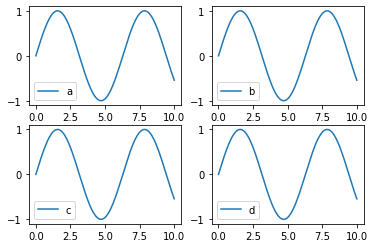

In [2]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)


plt.subplot(221)
plt.plot(x, y, label='a')
plt.legend()

plt.subplot(222)
plt.plot(x, y, label='b')
plt.legend()

plt.subplot(223)
plt.plot(x, y, label='c')
plt.legend()

plt.subplot(224)
plt.plot(x, y, label='d')
plt.legend()


plt.show()

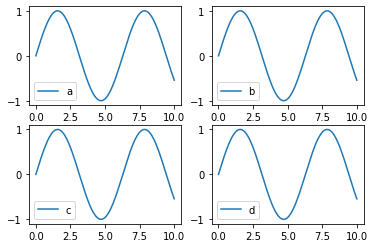

In [3]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)


plt.subplot(2, 2, 1)
plt.plot(x, y, label='a')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y, label='b')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y, label='c')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, y, label='d')
plt.legend()


plt.show()

## Subplots

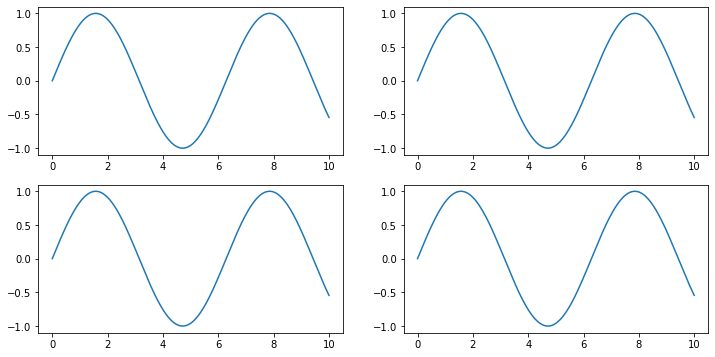

In [4]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

ax[0,0].plot(x, y, label='a')
ax[0,1].plot(x, y, label='b')
ax[1,0].plot(x, y, label='c')
ax[1,1].plot(x, y, label='d')

plt.show()

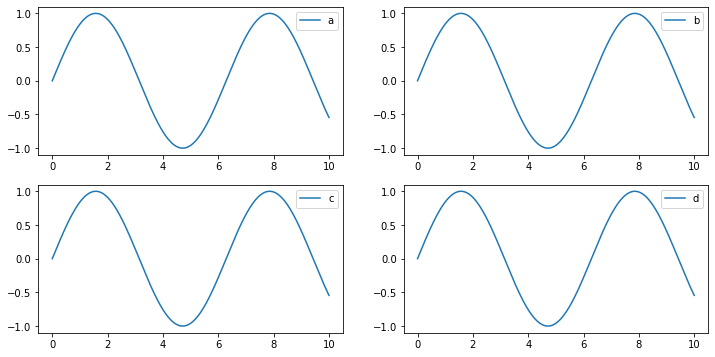

In [5]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

ax[0,0].plot(x, y, label='a')
ax[0,0].legend()

ax[0,1].plot(x, y, label='b')
ax[0,1].legend()

ax[1,0].plot(x, y, label='c')
ax[1,0].legend()

ax[1,1].plot(x, y, label='d')
ax[1,1].legend()


plt.show()

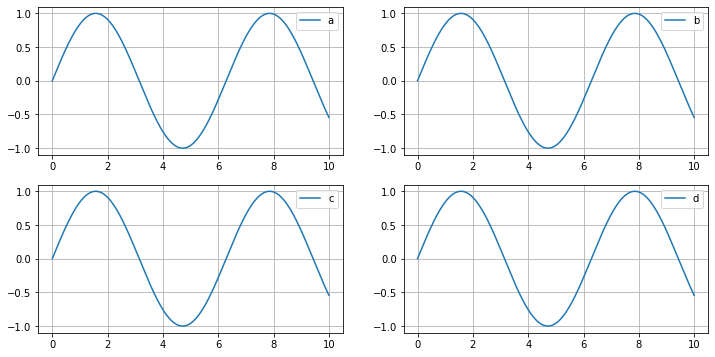

In [6]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

ax[0,0].plot(x, y, label='a')
ax[0,1].plot(x, y, label='b')
ax[1,0].plot(x, y, label='c')
ax[1,1].plot(x, y, label='d')

for chart in ax.ravel():
    chart.legend()
    chart.grid(True)


plt.show()

## Dostosowywanie

- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

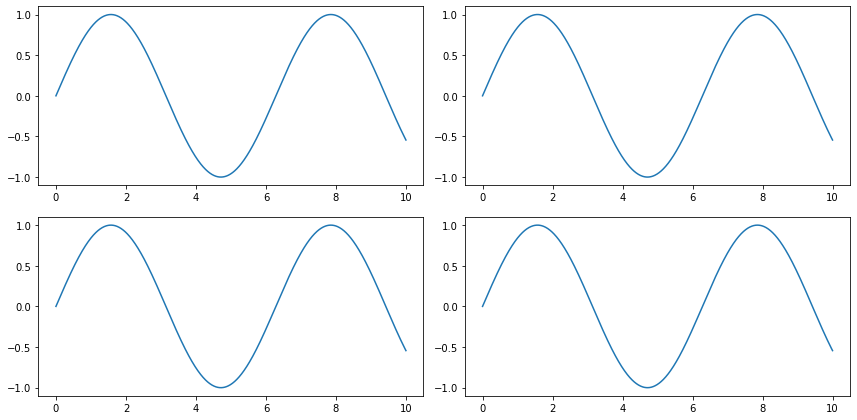

In [7]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.tight_layout()

ax[0,0].plot(x, y, label='a')
ax[0,1].plot(x, y, label='b')
ax[1,0].plot(x, y, label='c')
ax[1,1].plot(x, y, label='d')

plt.show()

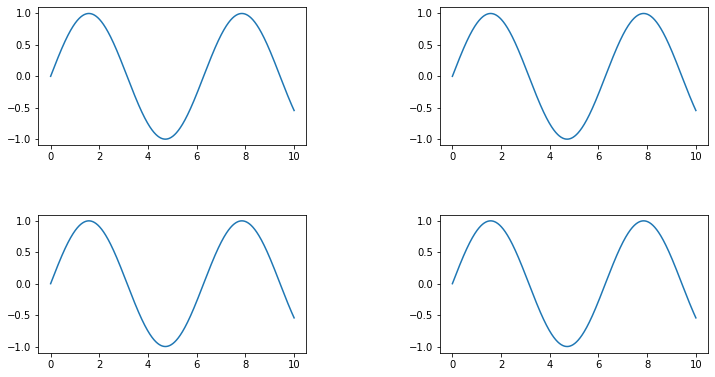

In [9]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

ax[0,0].plot(x, y, label='a')
ax[0,1].plot(x, y, label='b')
ax[1,0].plot(x, y, label='c')
ax[1,1].plot(x, y, label='d')

plt.subplots_adjust(
    left = 0.125,  # the left side of the subplots of the figure
    right = 0.9,   # the right side of the subplots of the figure
    bottom = 0.1,  # the bottom of the subplots of the figure
    top = 0.9,     # the top of the subplots of the figure
    wspace = 0.5,  # the amount of width reserved for space between subplots,
                   # expressed as a fraction of the average axis width
    hspace = 0.5,  # the amount of height reserved for space between subplots,
                   # expressed as a fraction of the average axis height
)

plt.show()

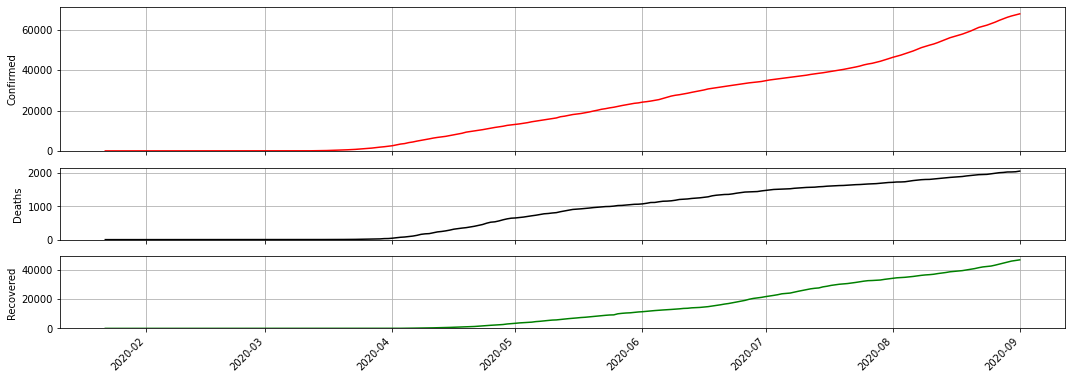

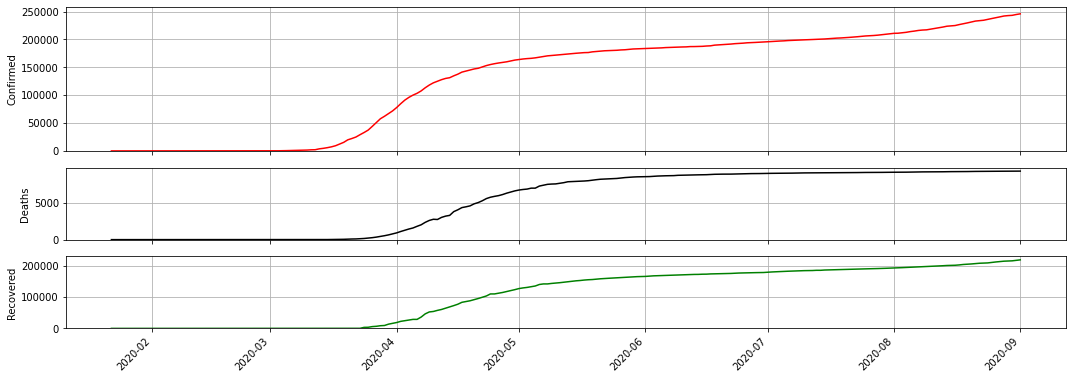

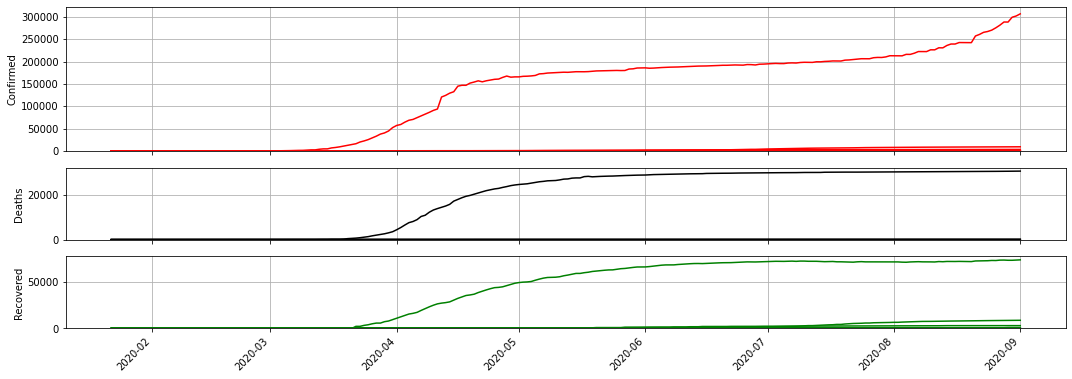

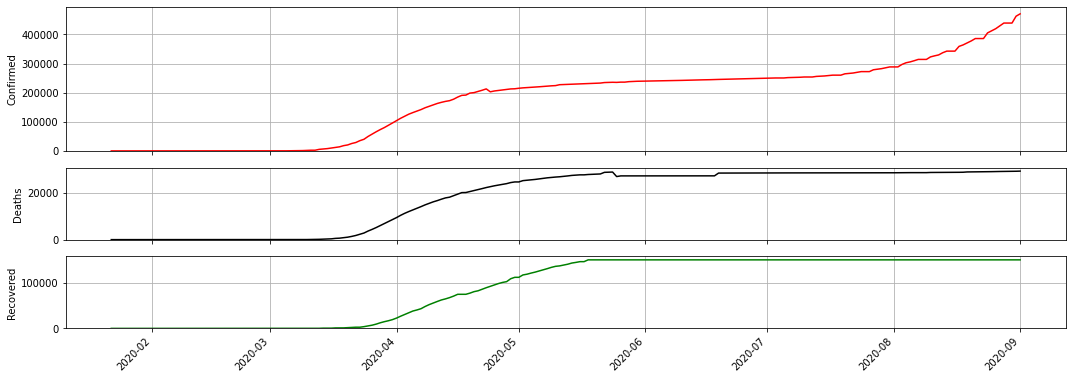

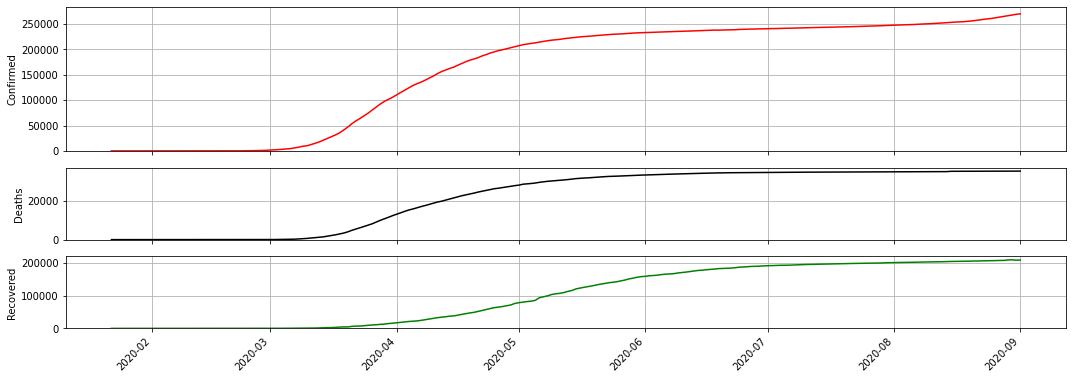

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)


def plot(name: str) -> None:
    # Select matching country
    c = confirmed['Country/Region'] == name
    d = deaths['Country/Region'] == name
    r = recovered['Country/Region'] == name

    # Merge data and discard not needed columns
    df = pd.concat([
        confirmed.loc[c].transpose()[4:],
        deaths.loc[d].transpose()[4:],
        recovered.loc[r].transpose()[4:]
    ], axis=1, keys=['Confirmed', 'Deaths', 'Recovered'])

    # Set columns and index
    df.columns = df.columns.droplevel(1)
    df.index = pd.to_datetime(df.index)
    df.sort_index(ascending=True, inplace=True)

    # Create figure and axis objects
    fig, ax = plt.subplots(
        nrows=3,
        ncols=1,
        sharex=True,
        sharey=False,
        gridspec_kw={'height_ratios': [2, 1, 1]},
        figsize=(15, 5))

    # Set layout for 'Confirmed' cases
    ax[0].plot(df['Confirmed'], color='red')
    ax[0].set_ylim(ymin=0, ymax=None)
    ax[0].set_ylabel('Confirmed')
    ax[0].grid(True, which='major')

    # Set layout for 'Deaths' cases
    ax[1].plot(df['Deaths'], color='black')
    ax[1].set_ylim(ymin=0, ymax=None)
    ax[1].set_ylabel('Deaths')
    ax[1].grid(True, which='major')

    # Set layout for 'Recovered' cases
    ax[2].plot(df['Recovered'], color='green')
    ax[2].set_ylim(ymin=0, ymax=None)
    ax[2].set_ylabel('Recovered')
    ax[2].grid(True, which='major')

    # Set general layout for figure (all axis)
    fig.tight_layout()
    plt.setp(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()


plot('Poland')
plot('Germany')
plot('France')
plot('Spain')
plot('Italy')